In [34]:
import pandas as pd

In [35]:
train = pd.read_csv("/Users/shridhar/Downloads/train.csv")

In [36]:
test = pd.read_csv("/Users/shridhar/Downloads/test.csv")

In [37]:
print("The shape of the train data is (row, column): "+ str(train.shape))
print(train.info())

The shape of the train data is (row, column): (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [38]:
print("The shape of test data is (row, column): "+ str(test.shape))
print(test.info())

The shape of test data is (row, column): (418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
pd.DataFrame(train.Embarked.value_counts(dropna=False))

,Embarked
S,644
C,168
Q,77
NaN,2


In [41]:
train.drop('PassengerId', axis=1, inplace=True)
test.drop('PassengerId', axis=1, inplace=True)

In [44]:
print(train.info())
print("*"*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB
None
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float

In [58]:
total = train.isnull().sum().sort_values(ascending=False)
percent = round((total/len(train)*100),2)
pd.concat([total,percent], axis = 1, keys = ['total', 'percent'])

,total,percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [59]:
total1 = test.isnull().sum().sort_values(ascending=False)
percent1 = round((total1/len(test)*100),2)
pd.concat([total1,percent1], axis = 1, keys = ['total', 'percent'])

,total,percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [68]:
#Embarked feature
total = pd.DataFrame(round(train.Embarked.value_counts(dropna=False),2))
percent = pd.DataFrame(train.Embarked.value_counts(dropna=False)/len(train)*100)
pd.concat([total, percent], axis=1, keys = ['total','percent'])

,total,percent
,Embarked,Embarked
S,644,72.278339
C,168,18.855219
Q,77,8.641975
NaN,2,0.224467


In [70]:
#It seems only 22% of data are missing, let's see them with full row
train[train.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [84]:
#Both passengers are female and has fare 80 with Cabin B28. Both are survivded and has Pclass as 1.
#Lets visualize the data which has similar conditions
train[(train.Pclass==1) & (train.Sex=="female") & (train.Parch == 0)].Embarked.mode()

0    C
dtype: object

In [85]:
#As 'C' is the mode with the conditions we impute C in null embarked
train.Embarked.fillna("C",inplace=True)

In [90]:
#For this kernel I will keep the data. We will assign all the null values as "N"
train.Cabin.fillna("N",inplace=True)
test.Cabin.fillna("N", inplace=True)

In [105]:
#All the cabin names start with an English alphabet following by digits. We can group these cabins 
#by naming these cabins with that first alphabet.
train.Cabin = [i[0] for i in train.Cabin]
test.Cabin = [i[0] for i in test.Cabin]
pd.DataFrame(train.Cabin.value_counts(dropna=False))

,Cabin
N,687
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1


In [116]:
#Training dataset dont have any missing value in Fare feature. Testing dataset has only one missing value in Fare.
test[test.Fare.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [115]:
missing_fare = test[(test.Pclass==3) & (test.Sex == 'male') & (test.Embarked == 'S') & (test.SibSp==0) & (test.Parch==0) & (test.Cabin =='N')].Fare.mean()
test.Fare.fillna(missing_fare, inplace=True)

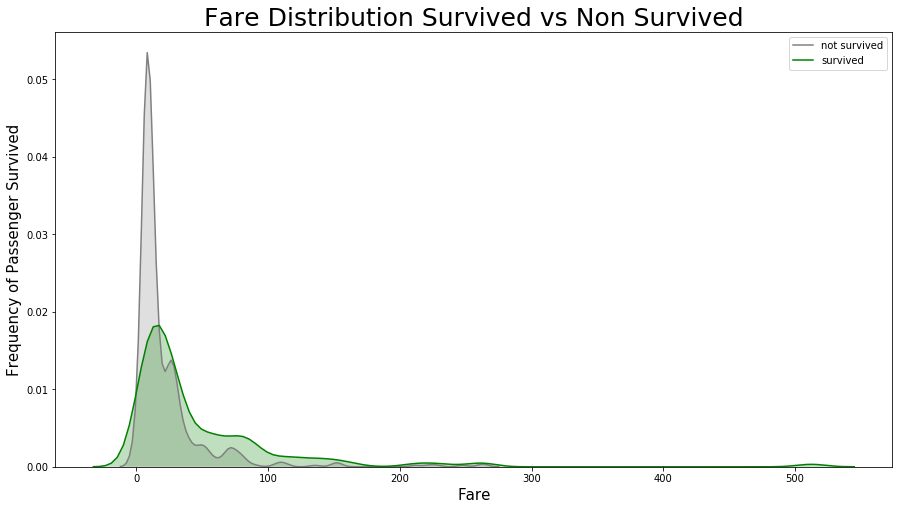

In [120]:
from matplotlib import pyplot as plt
import seaborn as sns
# Kernel Density Plot for Fare and Survived
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Fare", fontsize = 15)
plt.show()

This plot shows something impressive..

The spike in the plot under 100 dollar represents that a lot of passengers who bought the ticket within that range did not survive.
When fare is approximately more than 280 dollars, there is no gray shade which means, either everyone passed that fare point survived or maybe there is an outlier that clouds our judgment. Let's check...

In [121]:
train[train.Fare > 280]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,N,C
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B,C
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B,C


As we assumed, it looks like an outlier with a fare of $512. We sure can delete this point. However, we will delete them.

/Users/shridhar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/shridhar/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


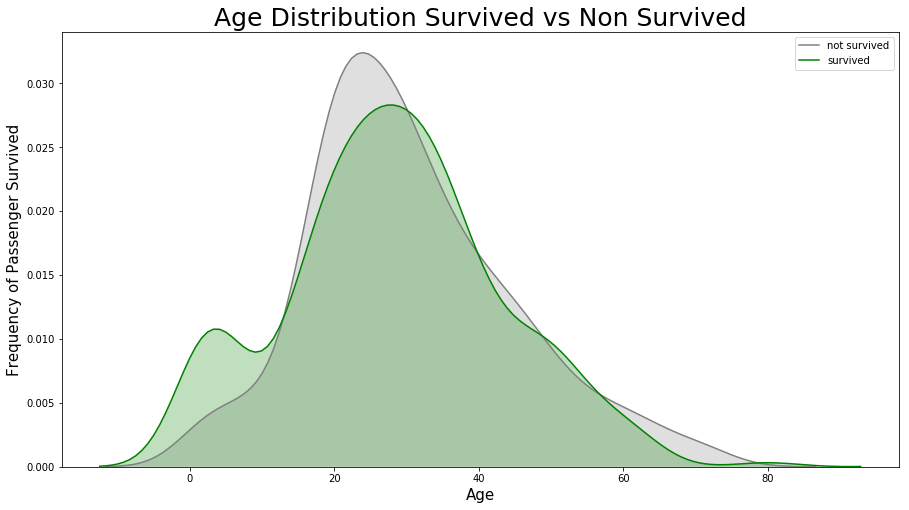

In [123]:
# Kernel Density Plot for Fare and Survived
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution Survived vs Non Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.show()

There is nothing out of the ordinary of about this plot, except the very left part of the distribution. It proves that children and infants were the priority, therefore, a good chunk of infant/children were saved.

Correlations

Combined Feature Relations

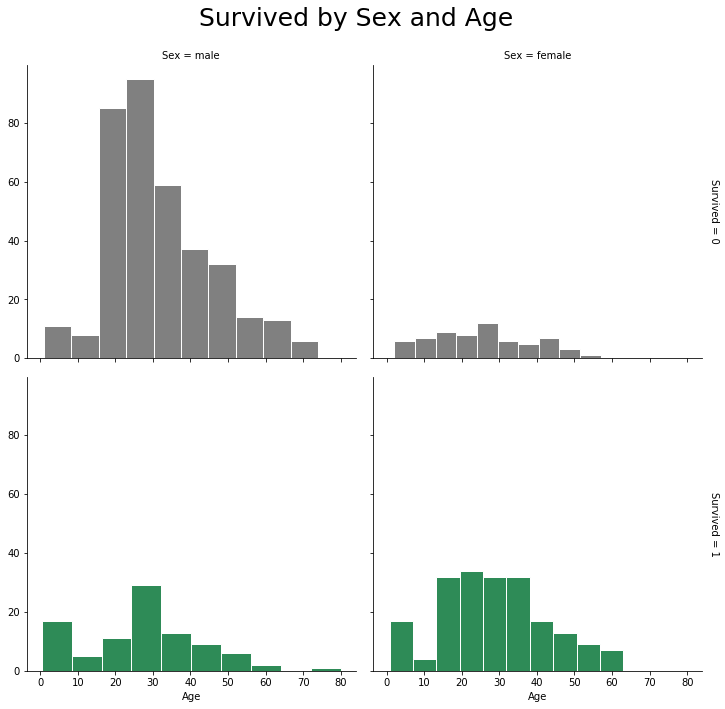

In [126]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(train,size=5, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

Facetgrid is a great way to visualize multiple variables and their relationships at once. We already have a idea of females being more of a priority then males. However, from this facet grid, we can also understand which age range groups survived more than others or were not so lucky

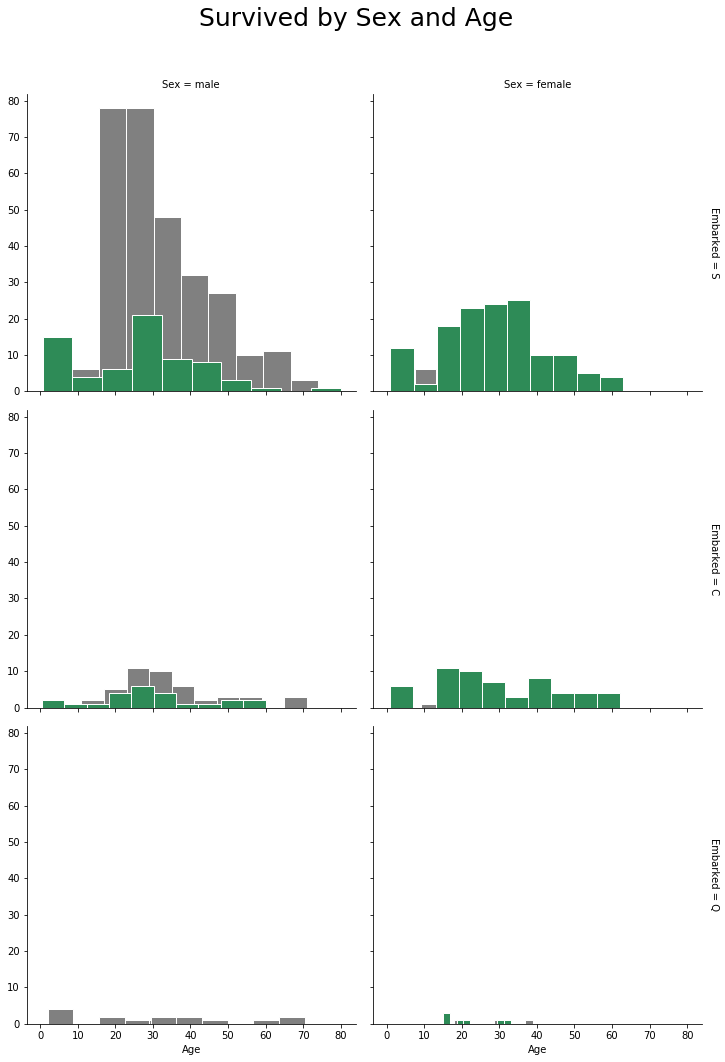

In [127]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(train,size=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

Now that I have steered out the apparent let's see if we can get some insights that are not so obvious as we look at the data.

Most passengers seem to be boarded on Southampton(S).

More than 60% of the passengers died boarded on Southampton.

More than 60% of the passengers lived boarded on Cherbourg(C).

Pretty much every male that boarded on Queenstown(Q) did not survive.

There were very few females boarded on Queenstown, however, most of them survived.

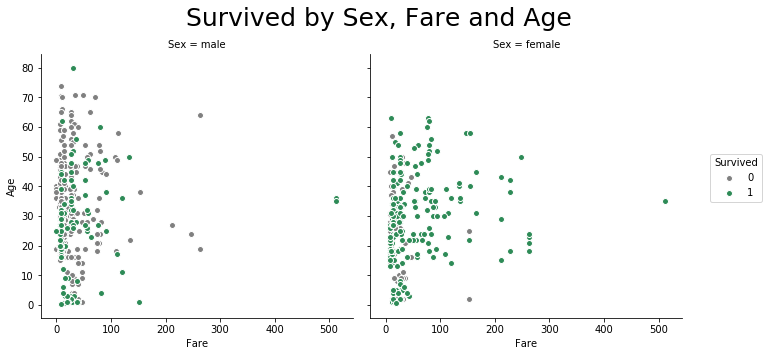

In [128]:
g = sns.FacetGrid(train, size=5,hue="Survived", col ="Sex", margin_titles=True,
                palette=pal,)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age", size = 25)
plt.subplots_adjust(top=0.85)

. The diagram above clearly demonstrates the three outliers with Fare of over $500. At this point, I think we are quite confident that these outliers should be deleted.

. Most of the passengers were with in the Fare range of 100.

In [129]:
## dropping the three outliers where Fare is over $500 
train = train[train.Fare < 500]

In [145]:
#Placing 0 for female and 1 for male
train['Sex'] = train.Sex.apply(lambda x: 0 if x=='female' else 1) 
test['Sex'] = test.Sex.apply(lambda x:0 if x=='female' else 1)

/Users/shridhar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [146]:
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,888.000000,888.000000,888.000000,711.000000,888.000000,888.000000,888.000000
mean,0.381757,2.313063,0.647523,29.675345,0.524775,0.381757,30.582164
std,0.486091,0.834007,0.478011,14.552495,1.104186,0.806949,41.176366
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,30.771850
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000


In [150]:
train.describe(include =['O'])

,Name,Ticket,Cabin,Embarked
count,888,888,888,888
unique,888,680,9,3
top,"Jenkin, Mr. Stephen Curnow",CA. 2343,N,S
freq,1,7,686,644


In [160]:
train[['Pclass', 'Survived']].groupby('Pclass').mean().reset_index()

,Pclass,Survived
0,1,0.624413
1,2,0.472826
2,3,0.242363


In [161]:
train.groupby('Survived').mean().reset_index()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1,1.958702,0.315634,28.270627,0.477876,0.466077,44.289799


In [162]:
train.groupby('Sex').mean().reset_index()

,Sex,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,0.741214,2.162939,27.888462,0.696486,0.651757,42.985091
1,1,0.186087,2.394783,30.705477,0.431304,0.234783,23.830658


In [165]:
total = pd.DataFrame(round(train.Sex.value_counts(dropna=False),2))
percent = pd.DataFrame(train.Sex.value_counts(dropna=False)/len(train)*100)
pd.concat([total, percent], axis=1, keys = ['total','percent'])

,total,percent
,Sex,Sex
1,575,64.752252
0,313,35.247748


After seeing the statistical overview above, following are the details noted down:

. Data has 891 rows and 9 columns

. only 38% of the passengrs survived during tragedy.

. Approximately 74% female and 19% male survived in this tragedy.

. Approximately 63% of the people survived who travelled through first class, while only 24% lower class passenger survived.

## Correlation Matrix and Heatmap

In [167]:
pd.DataFrame(abs(train.corr()['Survived']).sort_values(ascending=False))

,Survived
Survived,1.000000
Sex,0.545899
Pclass,0.334068
Fare,0.261742
Parch,0.082157
Age,0.079472
SibSp,0.033395


Sex is the most correlated feature to the dependent variable Survived

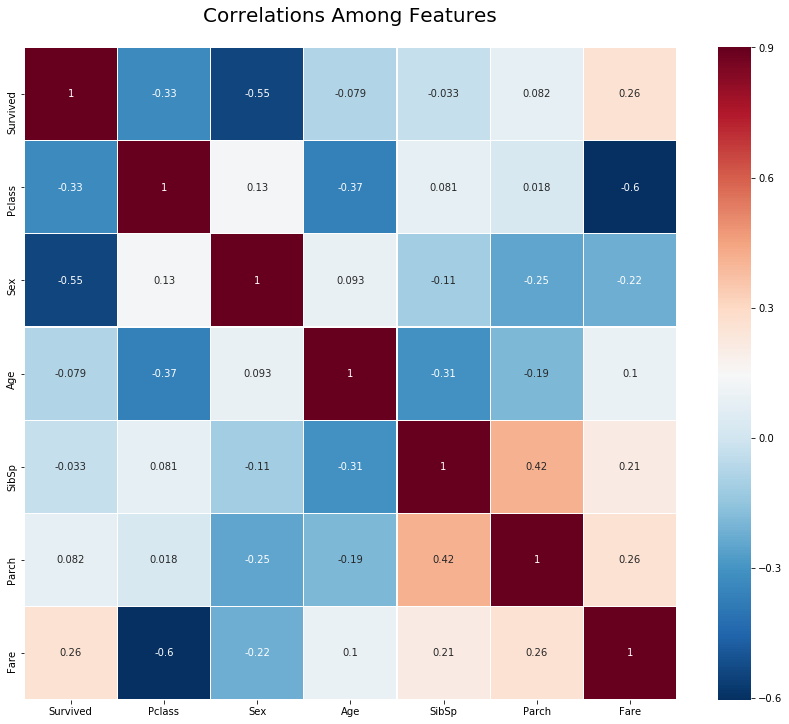

In [169]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example galle
import numpy as np
mask = np.zeros_like(train.corr(), dtype=np.bool)
plt.subplots(figsize = (15,12))
sns.heatmap(train.corr(), 
            annot=True,
            #mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20);

Positive Correlation Features:

    Fare and Survived: 0.26

Negative Correlation Features:

    Fare and Pclass: -0.6
    
    Sex and Survived: -0.55
    
    Pclass and Survived: -0.33

### Feature Engineering

In [171]:
# Creating a new colomn with a name
train['name_length'] = [len(i) for i in train.Name]
test['name_length'] = [len(i) for i in test.Name]

def name_length_group(size):
    a = ''
    if  (size <= 20):
        a = 'short'
    elif (size <=35):
        a = 'medium'
    elif (size <= 45):
        a = 'long'
    else:
        a = 'too_long'
    return a

train['nLength_group'] = train['name_length'].map(name_length_group)
test['nLength_group'] = test['name_length'].map(name_length_group)

/Users/shridhar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/shridhar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Title

In [178]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_length,nLength_group
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,N,S,23,medium
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C,51,too_long
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,N,S,22,medium
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S,44,long
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,N,S,24,medium


In [185]:
train['title'] = [i.split('.')[0] for i in train.Name]
train['title'] = [i.split(',')[1] for i in train.title]

/Users/shridhar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/shridhar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [186]:
test['title'] = [i.split('.')[0] for i in test.Name]
test['title'] = [i.split(',')[1] for i in test.title]

### Creating has_cabin feature

In [190]:
train['has_cabin'] = [0 if i == 'N' else 1 for i in train.Cabin]
test['has_cabin'] = [0 if i == 'N' else 1 for i in test.Cabin]

/Users/shridhar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [198]:
print("Train cabin values: " + str(sorted(train.Cabin.unique())))
print("*"*100)
print("Test cabin values: " +str(sorted(test.Cabin.unique())))

Train cabin values: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'N', 'T']
****************************************************************************************************
Test cabin values: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'N']


It looks like there is one more unique values in the training data. This will complicate running machine learning models. therefore when we create dummy variables, we will have to make sure to drop T column from training data.

### Creating family_size feature on SibSp

In [201]:
train['family_size'] = train.SibSp +  train.Parch + 1 #added one to it because to get if he is alone feature in next session
test['family_size'] = test.SibSp + test.Parch + 1

/Users/shridhar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [203]:
def family_group(size):
    a = ''
    if (size <= 1):
        a = 'loner'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

train['family_group'] = train['family_size'].map(family_group)
test['family_group'] = test['family_size'].map(family_group)

/Users/shridhar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


### Creating is_alone feature

In [205]:
train['is_alone'] = [1 if i < 2 else 0 for i in train.family_size] # 1 means yes and 0 means no
test['is_alone'] = [1 if i < 2 else 0 for i in test.family_size]

/Users/shridhar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Creating ticket feature

In [210]:
train.Ticket.value_counts().sample()

335677    1
Name: Ticket, dtype: int64

### Creating fare feature for each person

In [212]:
train['calculated_fare'] = train.Fare / train.family_size
test['calculated_fare'] = test.Fare / test.family_size

/Users/shridhar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [214]:
def fare_group(fare):
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a

train['fare_group'] = train['calculated_fare'].map(fare_group)
test['fare_group'] = test['calculated_fare'].map(fare_group)


/Users/shridhar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Some people have travelled in groups like family or friends. It seems like Fare column kept a record of the total fare rather than the fare of individual passenger, therefore calculated fare will be much handy in this situation.

## Creating dummy variables

In [216]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_length,nLength_group,title,has_cabin,family_size,family_group,is_alone,calculated_fare,fare_group
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,N,S,23,medium,Mr,0,2,small,0,3.62500,Very_low
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C,51,too_long,Mrs,1,2,small,0,35.64165,high
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,N,S,22,medium,Miss,0,1,loner,1,7.92500,low
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S,44,long,Mrs,1,2,small,0,26.55000,high
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,N,S,24,medium,Mr,0,1,loner,1,8.05000,low


In [217]:
train = pd.get_dummies(train, columns=['title',"Pclass", 'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=True)
test = pd.get_dummies(test, columns=['title',"Pclass",'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=True)

In [219]:
train.drop(['family_size','Ticket','Name', 'Fare','name_length'], axis=1, inplace=True)
test.drop(['family_size','Ticket','Name', 'Fare','name_length'], axis=1, inplace=True)


In [222]:
train.drop(['Cabin_T'], axis=1, inplace=True)

### Age feature

Age has missing values as seen earlier and we are going to use Random forest regressor in this section to predict the missing age values. Let's see how many missing values do we have now.

In [244]:
## rearranging the columns so that I can easily use the dataframe to predict the missing age values. 
train = pd.concat([train[["Survived", "Age", "Sex"]], train.loc[:,"SibSp":]], axis=1)
test = pd.concat([test[["Age", "Sex"]], test.loc[:,"SibSp":]], axis=1)

In [268]:
#importing regressor
from sklearn.ensemble import RandomForestRegressor

def completing_age(df):
    age_df = df.loc[:,"Age":]
    temp_train = age_df.loc[age_df.Age.notnull()] ## df with not null age values
    temp_test = age_df.loc[age_df.Age.isnull()] #df with age null values
    y = temp_train.Age.values
    x = temp_train.loc[:,"Sex":].values
    retr =  RandomForestRegressor(n_estimators=1500, n_jobs=-1)
    retr.fit(x,y)
    predict_age = retr.predict(temp_test.loc[:,"Sex":])
    df.loc[df.Age.isnull(), "Age"] = predict_age
    return df

## Implementing the completing_age function in both train and test dataset. 
completing_age(train)
completing_age(test)

ValueError: Found array with 0 sample(s) (shape=(0, 42)) while a minimum of 1 is required.

/Users/shridhar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


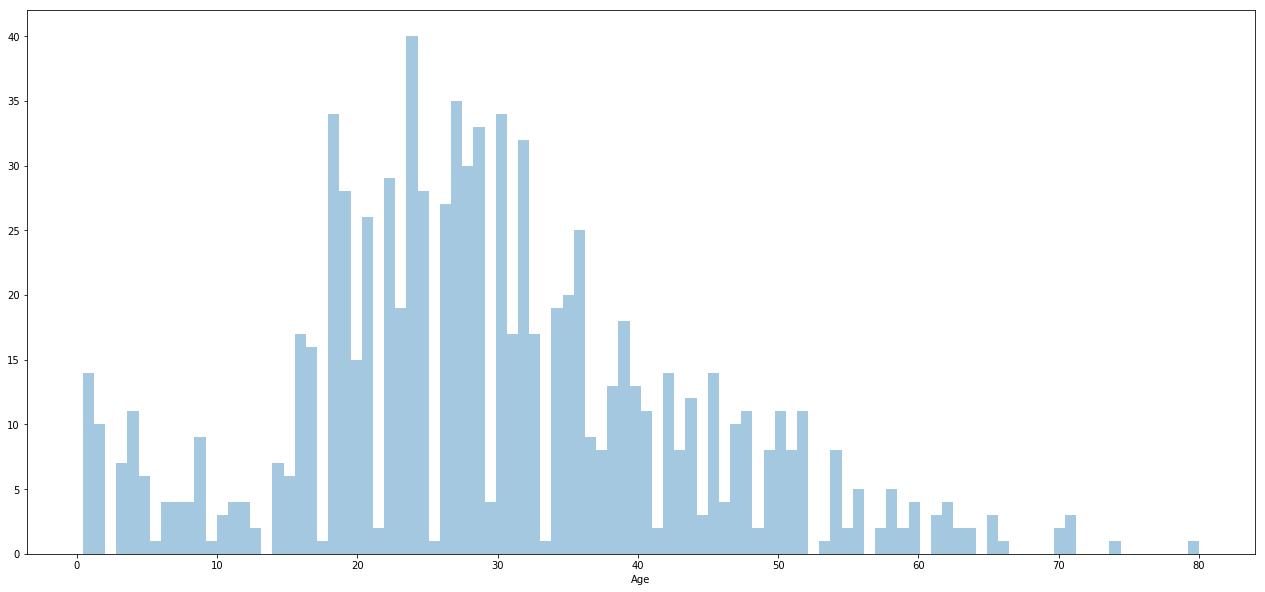

In [273]:
## Let's look at the his
plt.subplots(figsize = (22,10),)
sns.distplot(train.Age, bins = 100, kde = False, rug = False, norm_hist=False);

### Creating new features from Age

In [274]:
def age_group_fun(age):
    a=''
    if age <= 1:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a

## Applying "age_group_fun" function to the "Age" column.
train['age_group'] = train['Age'].map(age_group_fun)
test['age_group'] = test['Age'].map(age_group_fun)

## Creating dummies for "age_group" feature. 
train = pd.get_dummies(train,columns=['age_group'], drop_first=True)
test = pd.get_dummies(test,columns=['age_group'], drop_first=True);

In [275]:
train.drop('Age', axis=1, inplace=True)
test.drop('Age', axis=1, inplace=True)

### splitting the data into training and testing

In [277]:
# separating our independent and dependent variable
X = train.drop(['Survived'], axis=1)
y = train["Survived"]

In [279]:
#Splitting the data
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = .33, random_state = 0)

### feature scaling

In [281]:
# Feature Scaling
## We will be using standardscaler to transform
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

## transforming "train_x"
train_x = sc.fit_transform(train_x)
## transforming "train_x"
test_x = sc.transform(test_x)

In [284]:
## transforming "The testset"
sc = StandardScaler()
test = sc.fit_transform(test)

### Modeling the data

Logistic Regression

K-Nearest Neighbors(KNN)

Gaussian Naive Bayes

Support Vector Machines

Decision Tree Classifier

Bagging on Decision Tree Classifier

Random Forest Classifier

Gradient Boosting Classifier

In [286]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

logreg = LogisticRegression()
logreg.fit(train_x, train_y)

y_pred = logreg.predict(test_x)

print ("Accuracy Score: {}".format(round(accuracy_score(y_pred, test_y),4)))

Accuracy Score: 0.7959


In [290]:
#To overcome overfit and underfit it is good to use stratified shuffle split
## We can use KFold, StratifiedShuffleSplit, StratiriedKFold or ShuffleSplit, They are all close cousins. look at sklearn userguide for more info.

from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
logreg = LogisticRegression()
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state = 0)
accuracies = cross_val_score(logreg, X,y, cv = cv)

print("Cross-validation accuracy scores:{}".format(accuracies))
print("Mean of Cross-validation accuracy scores:{}".format(round(accuracies.mean(),5)))

Cross-validation accuracy scores:[0.81981982 0.83783784 0.83333333 0.83333333 0.83333333 0.85135135
 0.81081081 0.85135135 0.83333333 0.81981982]
Mean of Cross-validation accuracy scores:0.83243


In [291]:
#Grid search on logistic regression 
from sklearn.model_selection import GridSearchCV, StratifiedKFold
## C_vals is the alpla value of lasso and ridge regression(as alpha increases the model complexity decreases,)
## remember effective alpha scores are 0<alpha<infinity 
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]
## Choosing penalties(Lasso(l1) or Ridge(l2))
penalties = ['l1','l2']
## Choose a cross validation strategy. 
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state = 0 )
# setting param for param_grid in GridSearchCV. 
param = {'penalty': penalties, 'C': C_vals}
logreg = LogisticRegression(solver='liblinear')
## Calling on GridSearchCV object. 
grid = GridSearchCV(estimator=logreg, 
                           param_grid = param,
                           scoring = 'accuracy',
                            n_jobs =-1,
                           cv = cv
                          )
## Fitting the model
grid.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.25,
            train_size=None),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 16.5, 17, 17.5, 18]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [292]:
## Getting the best of everything. 
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.8364864864864865
{'C': 0.4, 'penalty': 'l1'}
LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


## KNN

In [296]:
from sklearn.preprocessing import StandardScaler
std_scl = StandardScaler()
## Standard scaling the predictor variables. 
X = std_scl.fit_transform(X)

In [298]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=2)
accuracies = cross_val_score(knn, X,y, cv = cv, scoring='accuracy')
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),3)))

Cross-Validation accuracy scores:[0.77027027 0.77477477 0.81531532 0.79279279 0.78378378 0.81081081
 0.77477477 0.78828829 0.75675676 0.8018018 ]
Mean Cross-Validation accuracy score: 0.787


In [299]:
#Manually find the best possible k value for KNN
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X,y, cv = cv, scoring = 'accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.7594594594594595, 0.7716216216216216, 0.7711711711711713, 0.7716216216216217, 0.786936936936937, 0.7720720720720722, 0.7774774774774775, 0.7765765765765765, 0.7833333333333333, 0.7878378378378379, 0.7963963963963964, 0.7891891891891892, 0.7923423423423424, 0.7891891891891891, 0.7981981981981983, 0.7878378378378379, 0.7954954954954955, 0.7837837837837838, 0.7878378378378377, 0.7779279279279279, 0.7810810810810811, 0.7747747747747746, 0.7756756756756756, 0.768018018018018, 0.7743243243243243, 0.7657657657657657, 0.7720720720720721, 0.7657657657657657, 0.7680180180180181, 0.7617117117117116]


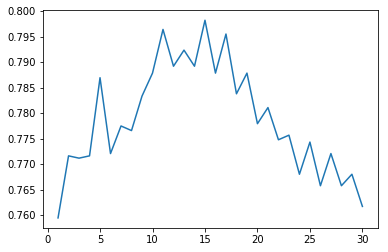

In [300]:
from matplotlib import pyplot as plt
plt.plot(k_range, k_scores)

In [306]:
#Grid search on KNN
from sklearn.model_selection import GridSearchCV
k_range = range(1,30)
weights_option = ['uniform','distance']
param = {'n_neighbors':k_range, 'weights':weights_option}
cv= StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
grid = GridSearchCV(knn, param,cv=cv,verbose = False, n_jobs=-1)
grid.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': range(1, 30), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=False)

In [307]:
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.7940074906367042
{'n_neighbors': 13, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


In [308]:
#Using Using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
## trying out multiple values for k
k_range = range(1,30)
## 
weights_options=['uniform','distance']
# 
param = {'n_neighbors':k_range, 'weights':weights_options}
## Using startifiedShufflesplit. 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
# estimator = knn, param_grid = param, n_jobs = -1 to instruct scikit learn to use all available processors. 
grid = RandomizedSearchCV(knn, param,cv=cv,verbose = False, n_jobs=-1, n_iter=20)
## Fitting the model. 
grid.fit(X,y)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
          error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'n_neighbors': range(1, 30), 'weights': ['uniform', 'distance']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=False)

In [309]:
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.7936329588014981
{'weights': 'uniform', 'n_neighbors': 17}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')


In [310]:
#Using stratified K fold for knn
from sklearn.model_selection import StratifiedKFold

n_neighbors=range(1,20)
weights=['uniform','distance']
param = {'n_neighbors':n_neighbors, 
         'weights':weights}
grid2 = GridSearchCV(knn, 
                     param,
                     verbose=False, 
                     cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True)
                    )
grid2.fit(train_x, train_y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 20), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=False)

In [311]:
print (grid2.best_params_)
print (grid2.best_score_)

{'n_neighbors': 12, 'weights': 'distance'}
0.8181818181818182


In [313]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(train_x, train_y)
y_pred = gaussian.predict(test_x)
gaussian_accuracy = round(accuracy_score(y_pred, test_y),3)
print(gaussian_accuracy)

0.646


### SVM

In [315]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', probability=True, random_state=1, C=3)
svc.fit(train_x, train_y)
y_pred = svc.predict(test_x)
svc_accy = round(accuracy_score(y_pred, test_y), 3)
print(svc_accy)

0.799


### Decision Tree Classifier

In [319]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(train_x, train_y)
y_pred = dtree.predict(test_x)
dtree_acc = round(accuracy_score(y_pred, test_y),3)
print(dtree_acc)

0.755


#### Decision Tree grid search

In [323]:
max_depth = range(1,30)
max_feature = [21,22,23,24,25,26,'auto']
criterion=["entropy", "gini"]

param = {'max_depth':max_depth, 
         'max_features':max_feature, 
         'criterion': criterion}

detree_g = GridSearchCV(dtree, 
                        param_grid = param, 
                        verbose=False, 
                        cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
                        n_jobs = -1
                       )
detree_g.fit(train_x, train_y)

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 30), 'max_features': [21, 22, 23, 24, 25, 26, 'auto'], 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=False)

In [324]:
print( detree_g.best_params_)
print (detree_g.best_score_)
print(detree_g.best_estimator_)

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 25}
0.8535353535353535
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=25, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [325]:
best_g = detree_g.best_estimator_
best_g.score(test_x, test_y)

0.7857142857142857

### Bagging Classifier

In [326]:
from sklearn.ensemble import BaggingClassifier
bagclas = BaggingClassifier()
bagclas.fit(train_x, train_y)
y_pred = bagclas.predict(test_x)
bag_acc = round(accuracy_score(y_pred, test_y),3)
print(bag_acc)

0.782


### Random forest classifier

In [327]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators=100,max_depth=9,min_samples_split=6, min_samples_leaf=4)
randomforest.fit(train_x, train_y)
y_pred = randomforest.predict(test_x)
random_accy = round(accuracy_score(y_pred, test_y), 3)
print (random_accy)

0.813


In [328]:
#Random forest classifier with grid search
n_estimators = [100,120]
max_depth = range(1,30)

parameters = {'n_estimators':n_estimators, 
         'max_depth':max_depth, 
        }
randomforest_grid = GridSearchCV(randomforest,
                                 param_grid=parameters,
                                 cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
                                 n_jobs = -1
                                )
randomforest_grid.fit(train_x, train_y) 

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 120], 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [332]:
print( randomforest_grid.best_params_)
print (randomforest_grid.best_score_)
print(randomforest_grid.best_estimator_)

{'max_depth': 4, 'n_estimators': 100}
0.8400673400673401
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [333]:
best_randomforest_grid = randomforest_grid.best_estimator_
best_randomforest_grid.score(test_x, test_y)

0.7959183673469388

### Gradient Boosting Classifier

In [334]:
from sklearn.ensemble import GradientBoostingClassifier

gradient = GradientBoostingClassifier()
gradient.fit(train_x, train_y)
y_pred = gradient.predict(test_x)
gradient_accy = round(accuracy_score(y_pred, test_y), 3)
print(gradient_accy)

0.803
